# **8. 고급 인공신경망의 구현**
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 머신러닝 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### **8.13 더 깊은 층으로 정확도를 높여보고 교차검증도 하자**

In [4]:
##### 8.5 절의 코드 활용
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255, x_test / 255 # 입력값 정규화

In [2]:


# 층을 추가한 모델 만들기
model = keras.models.Sequential( [
   keras.layers.Flatten(input_shape = (28, 28)),
   keras.layers.Dense(64, activation = 'relu'),
   keras.layers.Dense(64, activation = 'relu'),
   keras.layers.Dense(64, activation = 'relu'),
   keras.layers.Dense(10, activation = 'softmax'),
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 10,
                    validation_data = (x_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8630 - loss: 0.4737 - val_accuracy: 0.9568 - val_loss: 0.1400
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9615 - loss: 0.1272 - val_accuracy: 0.9666 - val_loss: 0.1058
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9717 - loss: 0.0907 - val_accuracy: 0.9677 - val_loss: 0.1054
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9780 - loss: 0.0688 - val_accuracy: 0.9694 - val_loss: 0.0994
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9821 - loss: 0.0580 - val_accuracy: 0.9662 - val_loss: 0.1109
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9843 - loss: 0.0491 - val_accuracy: 0.9720 - val_loss: 0.0933
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9869 - loss: 0.0406 - val_accuracy: 0.9736 - val_loss: 0.0900
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9883 - loss: 0.0366

<Axes: >

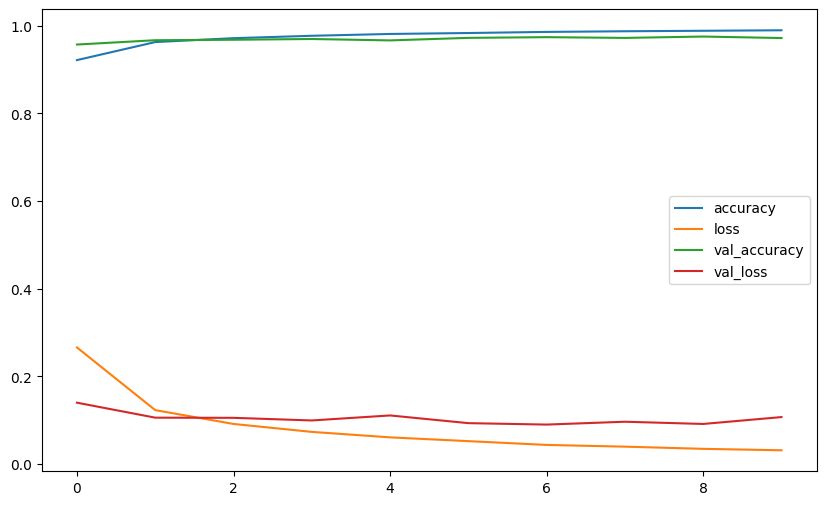

In [3]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 6))

In [6]:
model = keras.models.Sequential( [
   keras.layers.Flatten(input_shape = (28, 28)),
   keras.layers.Dense(64, activation = 'relu'),
   keras.layers.Dense(64, activation = 'relu'),
   keras.layers.Dense(64, activation = 'relu'),
   keras.layers.Dense(64, activation = 'relu'),
   keras.layers.Dense(64, activation = 'relu'),
   keras.layers.Dense(64, activation = 'relu'),
   keras.layers.Dense(10, activation = 'softmax'),
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 10,
                    validation_data = (x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8283 - loss: 0.5341 - val_accuracy: 0.9438 - val_loss: 0.1829
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9560 - loss: 0.1474 - val_accuracy: 0.9562 - val_loss: 0.1450
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9682 - loss: 0.1072 - val_accuracy: 0.9653 - val_loss: 0.1157
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9749 - loss: 0.0842 - val_accuracy: 0.9688 - val_loss: 0.1104
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9774 - loss: 0.0728 - val_accuracy: 0.9666 - val_loss: 0.1235
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9810 - loss: 0.0626 - val_accuracy: 0.9734 - val_loss: 0.0993
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9832 - loss: 0.0560 - val_accuracy: 0.9714 - val_loss: 0.1104
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9845 - loss: 0.0491 

<Axes: >

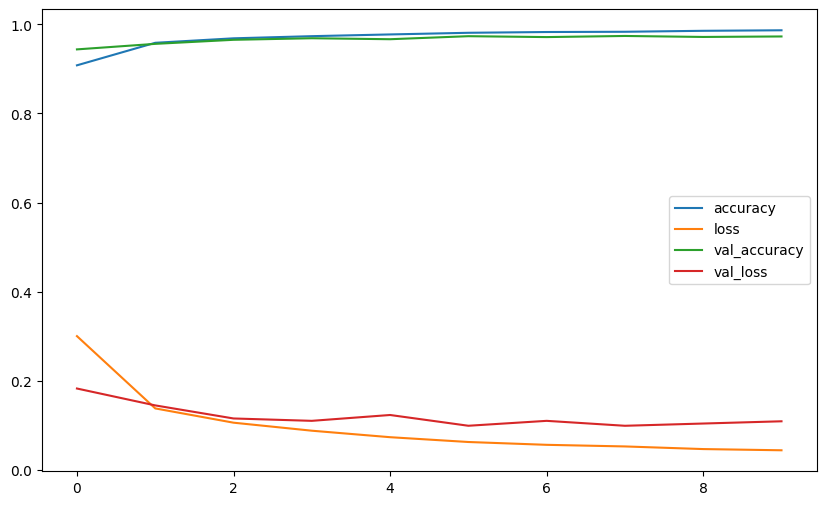

In [8]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 6))